In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.stats import mad_std
from matplotlib.colors import LogNorm
from photutils import DAOStarFinder
from photutils import aperture_photometry, CircularAperture, CircularAnnulus

0.014826727432716303
(350, 350)


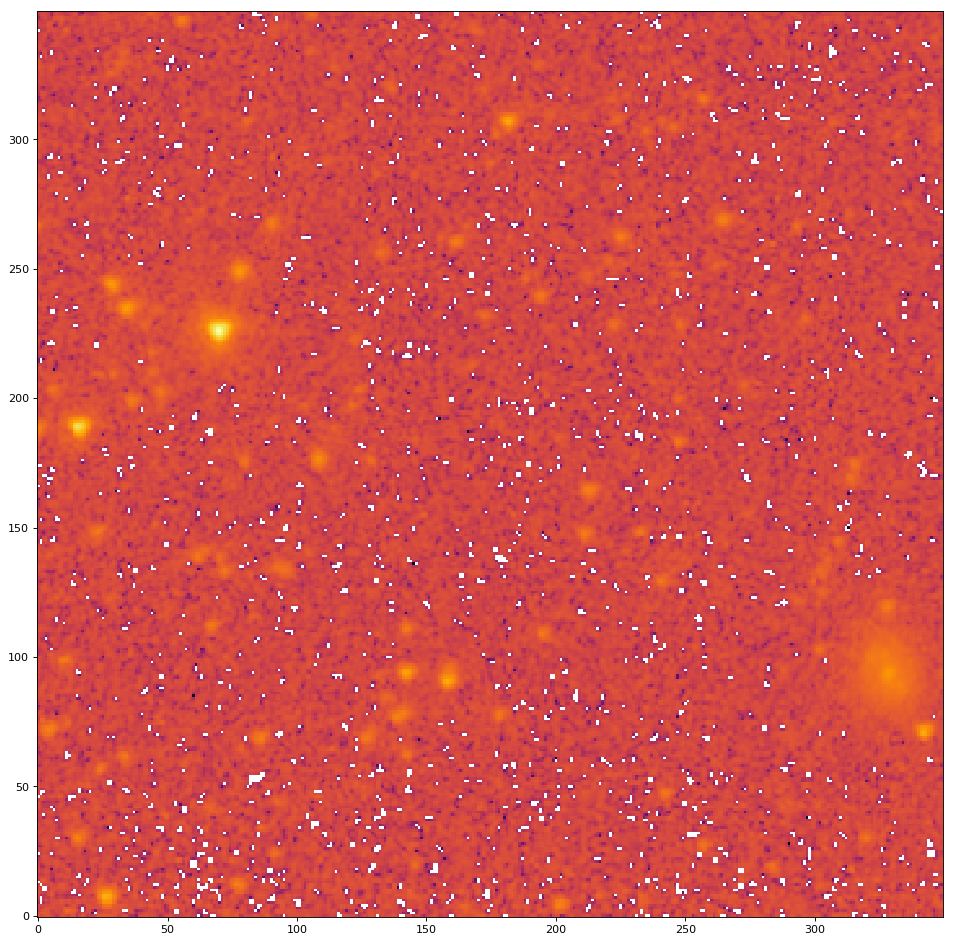

In [27]:
filename = '/u/m/amw58/dos/MPHYS_PROJECT/spitzer_images/43/43__e1/43__e1_3p6um.fits'
RR43 = fits.open(filename)
image_data = RR43[0].data
region = image_data[100:450,100:450]

plt.figure(figsize=(15,15),dpi=80)
plt.imshow(region,cmap='inferno',norm=LogNorm(),origin='left')

bkg_sigma = mad_std(region,ignore_nan=True)
print bkg_sigma
print region.shape

In [28]:
print 'Min:', np.nanmin(region)
print 'Max:', np.nanmax(region)
print 'Mean:', np.nanmean(region)
print 'Stdev:', np.nanstd(region)

Min: -0.11611517
Max: 30.031254
Mean: 0.036707256
Stdev: 0.20791966


 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1 final_sum
       pix       pix                                           
--- --------- --------- -------------- -------------- ---------
  1 26.395776 7.4227617      36.627235      2.8793232 31.326663
  2 158.29116 90.957583      31.572635      4.7440335 22.839301
  3 142.28331 94.017457      22.872596      5.4893976 12.767114
  4 328.64084 93.541639      65.314597      18.002695 32.173272
  5  15.63774 188.97357      116.89222      5.8529429 106.11748
  6 34.359602 234.77353      28.941572      11.053616 8.5928703
  7 28.614609 243.93422      23.951017      11.839502 2.1555691
  8 77.959947 249.02841      24.605597      5.0055997 15.390743


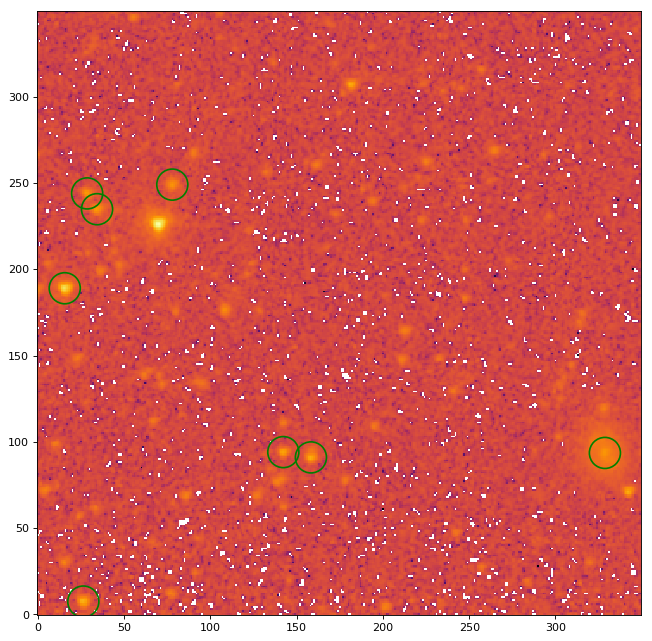

In [39]:
star_w = 9.

daofind = DAOStarFinder(fwhm=star_w,threshold=70.*bkg_sigma)
sources = daofind(region)
for col in sources.colnames:
    sources[col].info.format='%.8g'
    
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=star_w)
annuli = CircularAnnulus(positions,r_in=10.,r_out=12.)
totals = [apertures,annuli]
phot_table = aperture_photometry(region, totals)
for col in phot_table.colnames:
    phot_table[col].info.format='%.8g'

plt.figure(figsize=(10,10),dpi=80)
plt.imshow(region,cmap='inferno',origin='left',aspect='equal',norm=LogNorm())
apertures.plot(color='green',lw=1.5,alpha=1)

bkg_mean = phot_table['aperture_sum_1']/annuli.area()
bkg_sum = bkg_mean*apertures.area()
final_sum = phot_table['aperture_sum_0']-bkg_sum
phot_table['final_sum']=final_sum

print phot_table

In [13]:
print phot_table


 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1
       pix       pix                                 
--- --------- --------- -------------- --------------
  1 202.60312 6.3324127      12.236509      4.9546001
  2 27.316496 8.7586321      33.876188      5.9071694
  3 78.087952 13.528489       12.03555      7.2953939
  4 16.362534  31.71755      11.105318      6.9300797
  5 86.445707 70.617234      13.239462      7.2941462
  6 5.2059749 73.309639      13.201042      4.7613684
  7  343.0402 73.402041      26.563008      6.8394464
  8 140.13577 78.905309      15.269088      8.6211882
  9 159.08991  92.54285      28.219608      7.5921308
 10  143.0405 95.543388      21.348964      8.5565817
...       ...       ...            ...            ...
 17 16.252045 190.27092      112.25453      8.9868467
 18 36.837101  200.4463      12.459277      9.8667871
 19 70.291041 227.63761      381.51042      13.126953
 20 34.831812 236.19296      22.752261      14.352861
 21   29.0374 245.30682     